# Example of Bayesian updating on coin flip observations

This notebook is based on code a great [blog post](https://stmorse.github.io/journal/bayes_coin.html) by Steven Morse.

This is used as an illustrative example of Bayesian updating for the purpose of a talk introducing simulation-based inference.

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns

sns.set_theme(style="ticks")
plt.rcParams["figure.constrained_layout.use"] = False

In [2]:
# colors for prior, posterior and true parameter
palette = ["#132a70", "#C74322", "#6CA91D"]

We simulate 50 coin flips.

In [3]:
np.random.seed(123)  # fix randomness generator for reproducibility
observations = scipy.stats.bernoulli(0.6).rvs(50)
observations

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

In [4]:
a, b = 2, 2
prior = scipy.stats.beta(a, b)

# Define the range for the x-axis (probability values from 0 to 1)
xs = np.linspace(0, 1, 100)


def setup_plot():
    # Create a new figure for the animation
    fig, ax = plt.subplots(figsize=(6, 4))

    # Initial prior
    ax.plot(xs, prior.pdf(xs), marker=None, color="c", linestyle="-", label="Prior")

    ax.set_xlabel(r"Coin parameter $\theta$", fontsize=15)
    ax.set_ylabel(r"Belief as prob. density", fontsize=15)
    fig.tight_layout(h_pad=None)

    return fig, ax


# Function to update the plot
def update(frame):
    ax.clear()
    # Plot the prior distribution again
    ax.plot(xs, prior.pdf(xs), marker=None, color=palette[0], linestyle="-", linewidth=7, label=r"Prior $p(\theta)$")

    # Calculate the posterior distribution up to the current frame
    k = sum(observations[: frame + 1])
    n = frame + 1
    posterior = scipy.stats.beta(k + a, n - k + b)
    if n == 0:
        alpha = 0
    else:
        alpha = 1
    ax.plot(
        xs,
        posterior.pdf(xs),
        marker=None,
        color=palette[1],
        linestyle="-",
        linewidth=7,
        alpha=alpha,
        label=r"Posterior $p(\theta|x)$",
    )

    ax.axvline(0.6, linewidth=5, color=palette[2], label=r"True $\theta$")

    ax.text(
        0.95,
        0.5,
        "observations:\n" + str(observations[max(0, n - 30) : n]),
        fontsize=15,
        ha="right",
        transform=ax.transAxes,
    )

    ax.set_ylim(-0.15, 6)
    ax.set_xlabel(r"Coin parameter $\theta$", fontsize=15)
    ax.set_ylabel(r"Belief as prob. density", fontsize=15)
    ax.legend(loc="upper left", frameon=False)

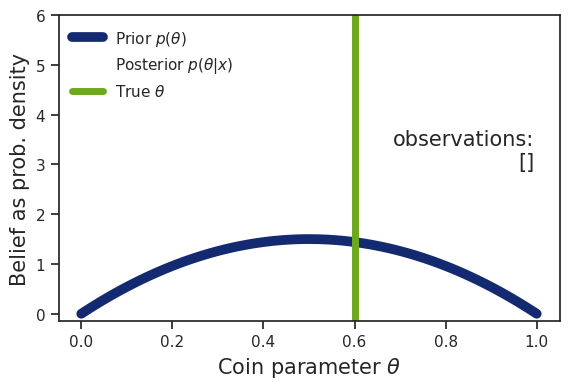

In [5]:
fig, ax = setup_plot()
update(-1)
fig.savefig("../figures/coin_prior.png")

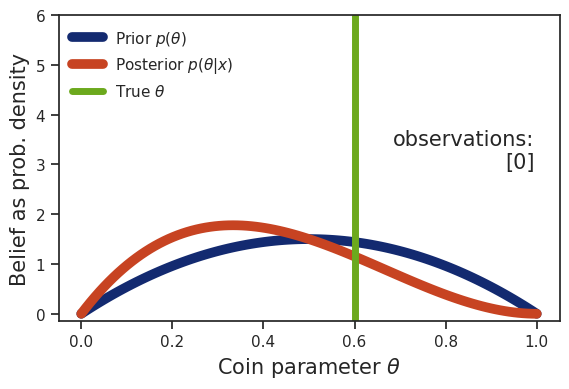

In [6]:
fig, ax = setup_plot()

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=len(observations), repeat=False)

# Save the animation as a gif
file_path = "../figures/coin_updates.gif"
ani.save(file_path, writer="imagemagick", fps=5)

![Animation](../figures/coin_updates.gif)